# Project Description

**Key-Points**:

- 

In [31]:
import requests
from bs4 import BeautifulSoup

def get_character_links(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a', class_='category-page__member-link')
    character_links = [link['href'].split('/wiki/')[-1] for link in links]
    return character_links

# Example usage:
url_a_h = "https://gameofthrones.fandom.com/wiki/Category:Individuals_appearing_in_Game_of_Thrones"
url_h_r = "https://gameofthrones.fandom.com/wiki/Category:Individuals_appearing_in_Game_of_Thrones?from=Heddle%2C+Masha%0AMasha+Heddle"
url_r_z = "https://gameofthrones.fandom.com/wiki/Category:Individuals_appearing_in_Game_of_Thrones?from=Red+Priestess+%28No+One%29"

characters_a_h = get_character_links(url_a_h)
characters_h_r = get_character_links(url_h_r)
characters_r_z = get_character_links(url_r_z)

# Combine all the characters into one list
all_characters = characters_a_h + characters_h_r + characters_r_z

# Save the list from all_characters to a txt file
with open('all_characters.txt', 'w') as f:
    for character in all_characters:
        f.write(character + '\n')


print(len(all_characters))
print(all_characters[:10])
print(all_characters[-10:])

594
['Aemon', 'Aggar', 'Aggo_(The_North_Remembers)', 'Aggo_(The_Red_Woman)', 'Alanna', 'Allo', 'Anara', 'Anguy', 'Archmaester_(Eastwatch)', 'Armeca']
['Wolkan', 'Wounded_Lannister_soldier', 'Wun_Weg_Wun_Dar_Wun', 'Wyl_(guard)', 'Othell_Yarwyck', 'Ygritte', 'Yoren', 'Yunkai%27i_whore', 'Zalla', 'Zanrush']


In [16]:
def get_character_references(character_link, all_characters):
    base_url = "https://gameofthrones.fandom.com/wiki/"
    full_url = base_url + character_link
    response = requests.get(full_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the div with id 'content' to limit the scope of where we look for links
    content_div = soup.find('div', id='content')
    if not content_div:
        # If the specific 'content' div isn't found, default to the entire soup object
        content_div = soup
    
    character_refs = content_div.find_all('a', href=True)
    referenced_characters = [
        ref['href'].split('/wiki/')[-1] for ref in character_refs
        if "/wiki/" in ref['href'] and ref['href'].split('/wiki/')[-1] in all_characters
    ]
    
    # Filter out any non-character links and remove duplicates
    referenced_characters = list(set([
        char for char in referenced_characters if char in all_characters
    ]))
    return referenced_characters

# Now create a list containing the characters and their references
character_references = []
for character in all_characters:
    references = get_character_references(character, all_characters)
    print(f"{character}: {references}")
    character_references.append((character, references))

# Output the first few entries to check
print(character_references[:10])


Aemon: ['Luke', 'Daario_Naharis', 'Aggo_(The_North_Remembers)', 'Echiel', 'Stiv', 'Qhono', 'Jack_Bulwer', 'Gilly', 'Jaremy_Rykker', 'Stannis_Baratheon', 'Harker', 'Wallen', 'Alliser_Thorne', 'Donnel_Hill', 'Irri', 'Olly', 'Grey_Worm', 'Tormund', 'Halder', 'Balian', 'Joby', 'Pypar', 'Benjen_Stark', 'Mossador', 'Matthar', 'Niko', 'Craster', 'Othor', 'Smitty', 'Lyanna_Stark', 'Aerys_II_Targaryen', 'Gared', 'Rast', 'Borba', 'Othell_Yarwyck', 'Samwell_Tarly', 'Kovarro', 'Mance_Rayder', 'Escan', 'Mully', 'Cooper', 'Rancer', 'Sam', 'Kegs', 'Jon_Snow', 'Daenerys_Targaryen', 'Cersei_Lannister', 'Will', 'Drogo', 'Rhaegar_Targaryen', 'Jorah_Mormont', 'Bannen', 'Dareon', 'Eddard_Stark', 'Jafer_Flowers', 'Vorkoy', 'Mink', 'Todder', 'Viserys_Targaryen_(son_of_Aerys_II)', 'Missandei', 'Waymar_Royce', 'Rhaego', 'Stonesnake', 'Eddison_Tollett', 'Clydas', 'Yoren', 'Karl_Tanner', 'Bowen_Marsh', 'Qhorin', 'Jeor_Mormont', 'Jhiqui', 'Grenn', 'Gordo', 'Ygritte', 'Nelugo', 'Doreah', 'Tyrion_Lannister', 'Aemon

In [19]:
# Find out how many characters in characeter_references contain a reference to "Jon_Snow"

# Create a list of all the characters that reference Jon Snow
jon_snow_references = [character for character, references in character_references if "Yunkai%27i_whore" in references]

# Print the number of characters that reference Jon Snow
print(len(jon_snow_references))
print(jon_snow_references)

3
['Prendahl_na_Ghezn', 'Mero', 'Daario_Naharis']


Nodes: ['Aemon', 'Luke', 'Daario_Naharis', 'Aggo_(The_North_Remembers)', 'Echiel', 'Stiv', 'Qhono', 'Jack_Bulwer', 'Gilly', 'Jaremy_Rykker']
Edges: [('Aemon', 'Luke'), ('Aemon', 'Daario_Naharis'), ('Aemon', 'Aggo_(The_North_Remembers)'), ('Aemon', 'Echiel'), ('Aemon', 'Stiv'), ('Aemon', 'Qhono'), ('Aemon', 'Jack_Bulwer'), ('Aemon', 'Gilly'), ('Aemon', 'Jaremy_Rykker'), ('Aemon', 'Stannis_Baratheon')]


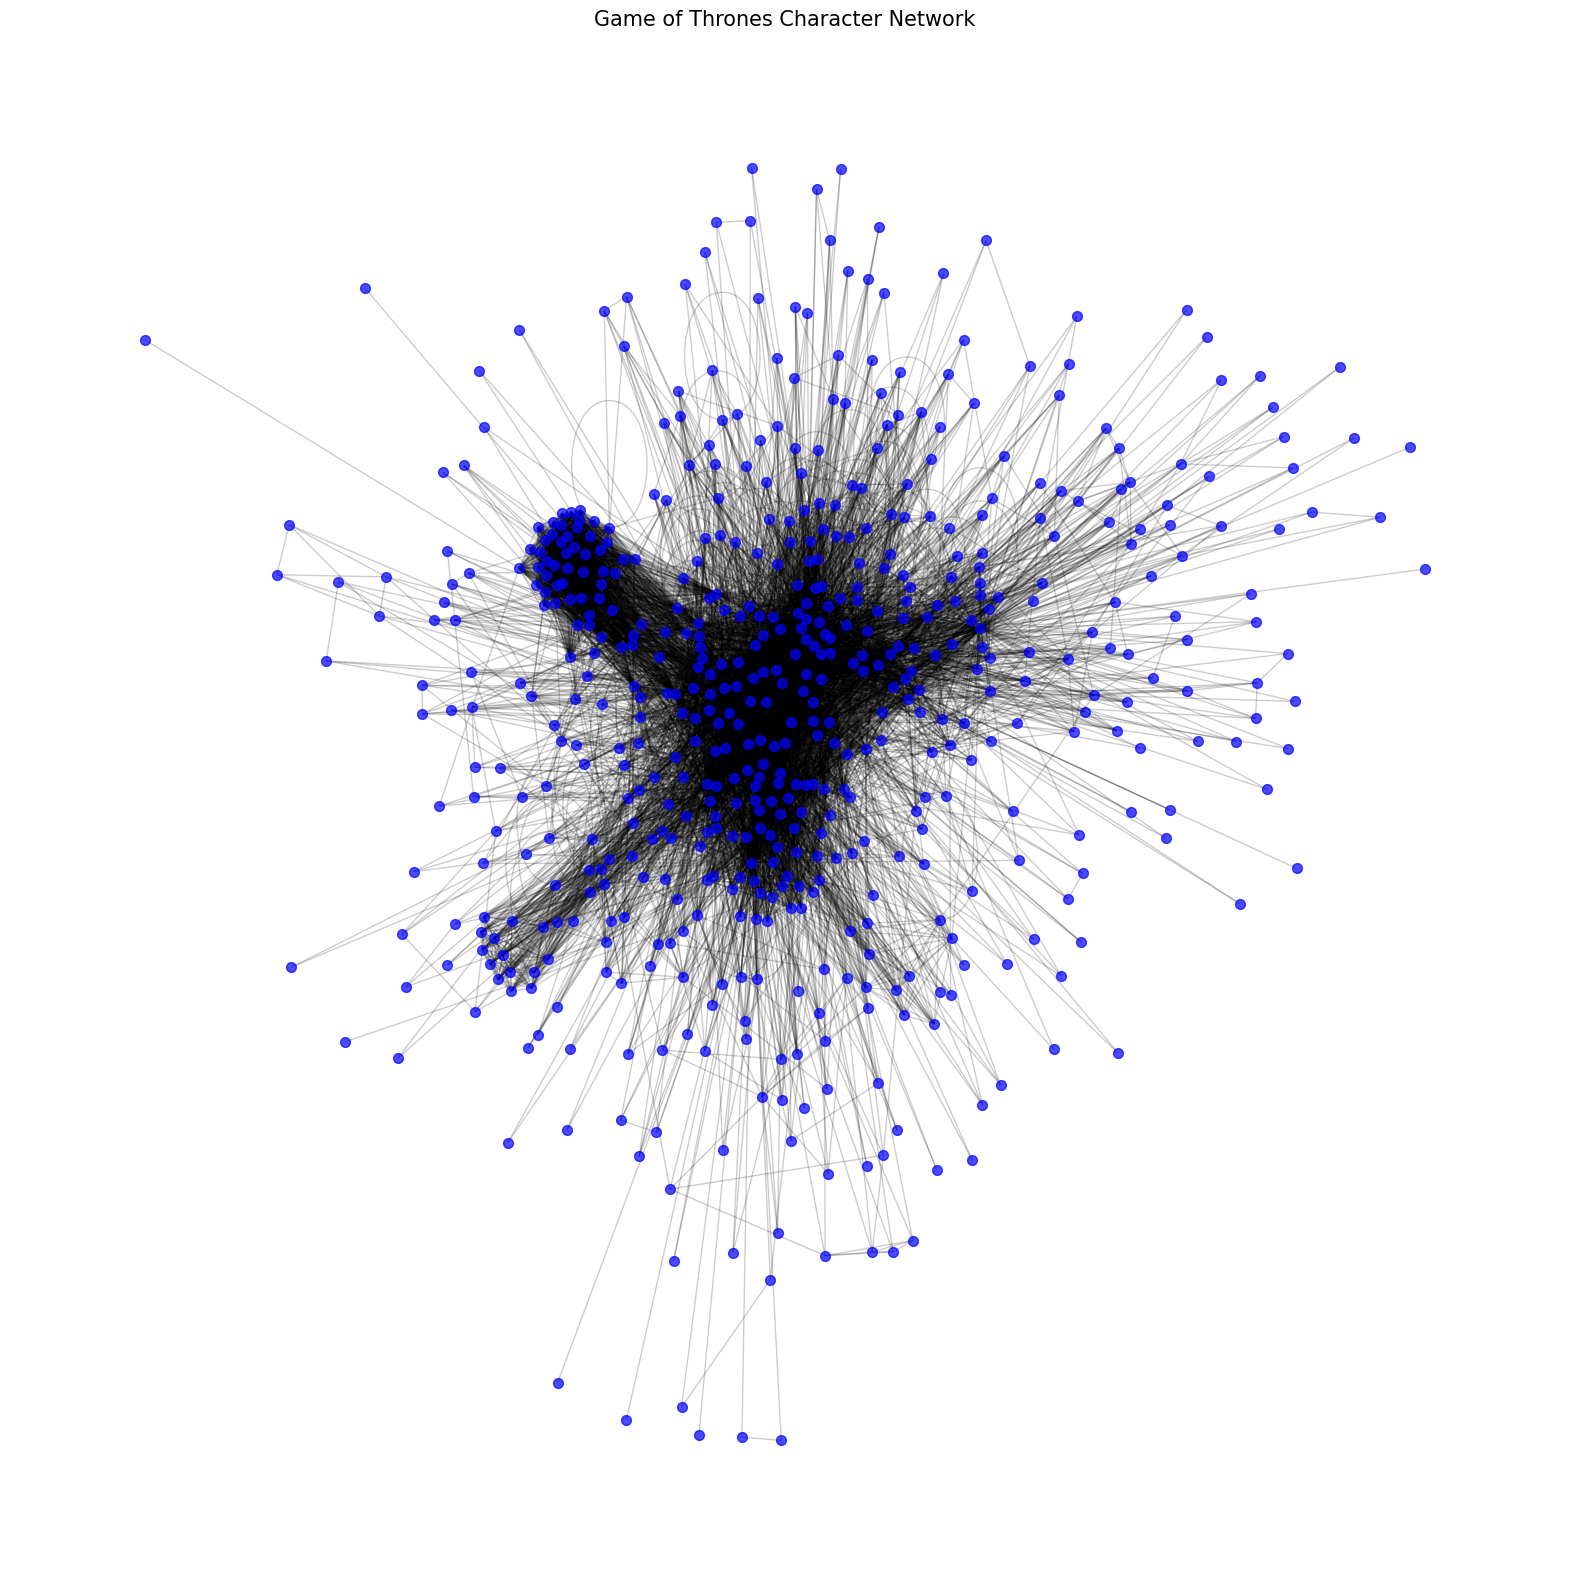

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Iterate through the character references to add nodes and edges to the graph
for character, references in character_references:
    # Add each character as a node
    if character not in G:
        G.add_node(character)

    # Add edges between the character and each referenced character
    for ref in references:
        # Since the graph is undirected, we only need to add the edge once
        if not G.has_edge(character, ref):
            G.add_edge(character, ref)


Number of nodes: 594
Number of edges: 9705


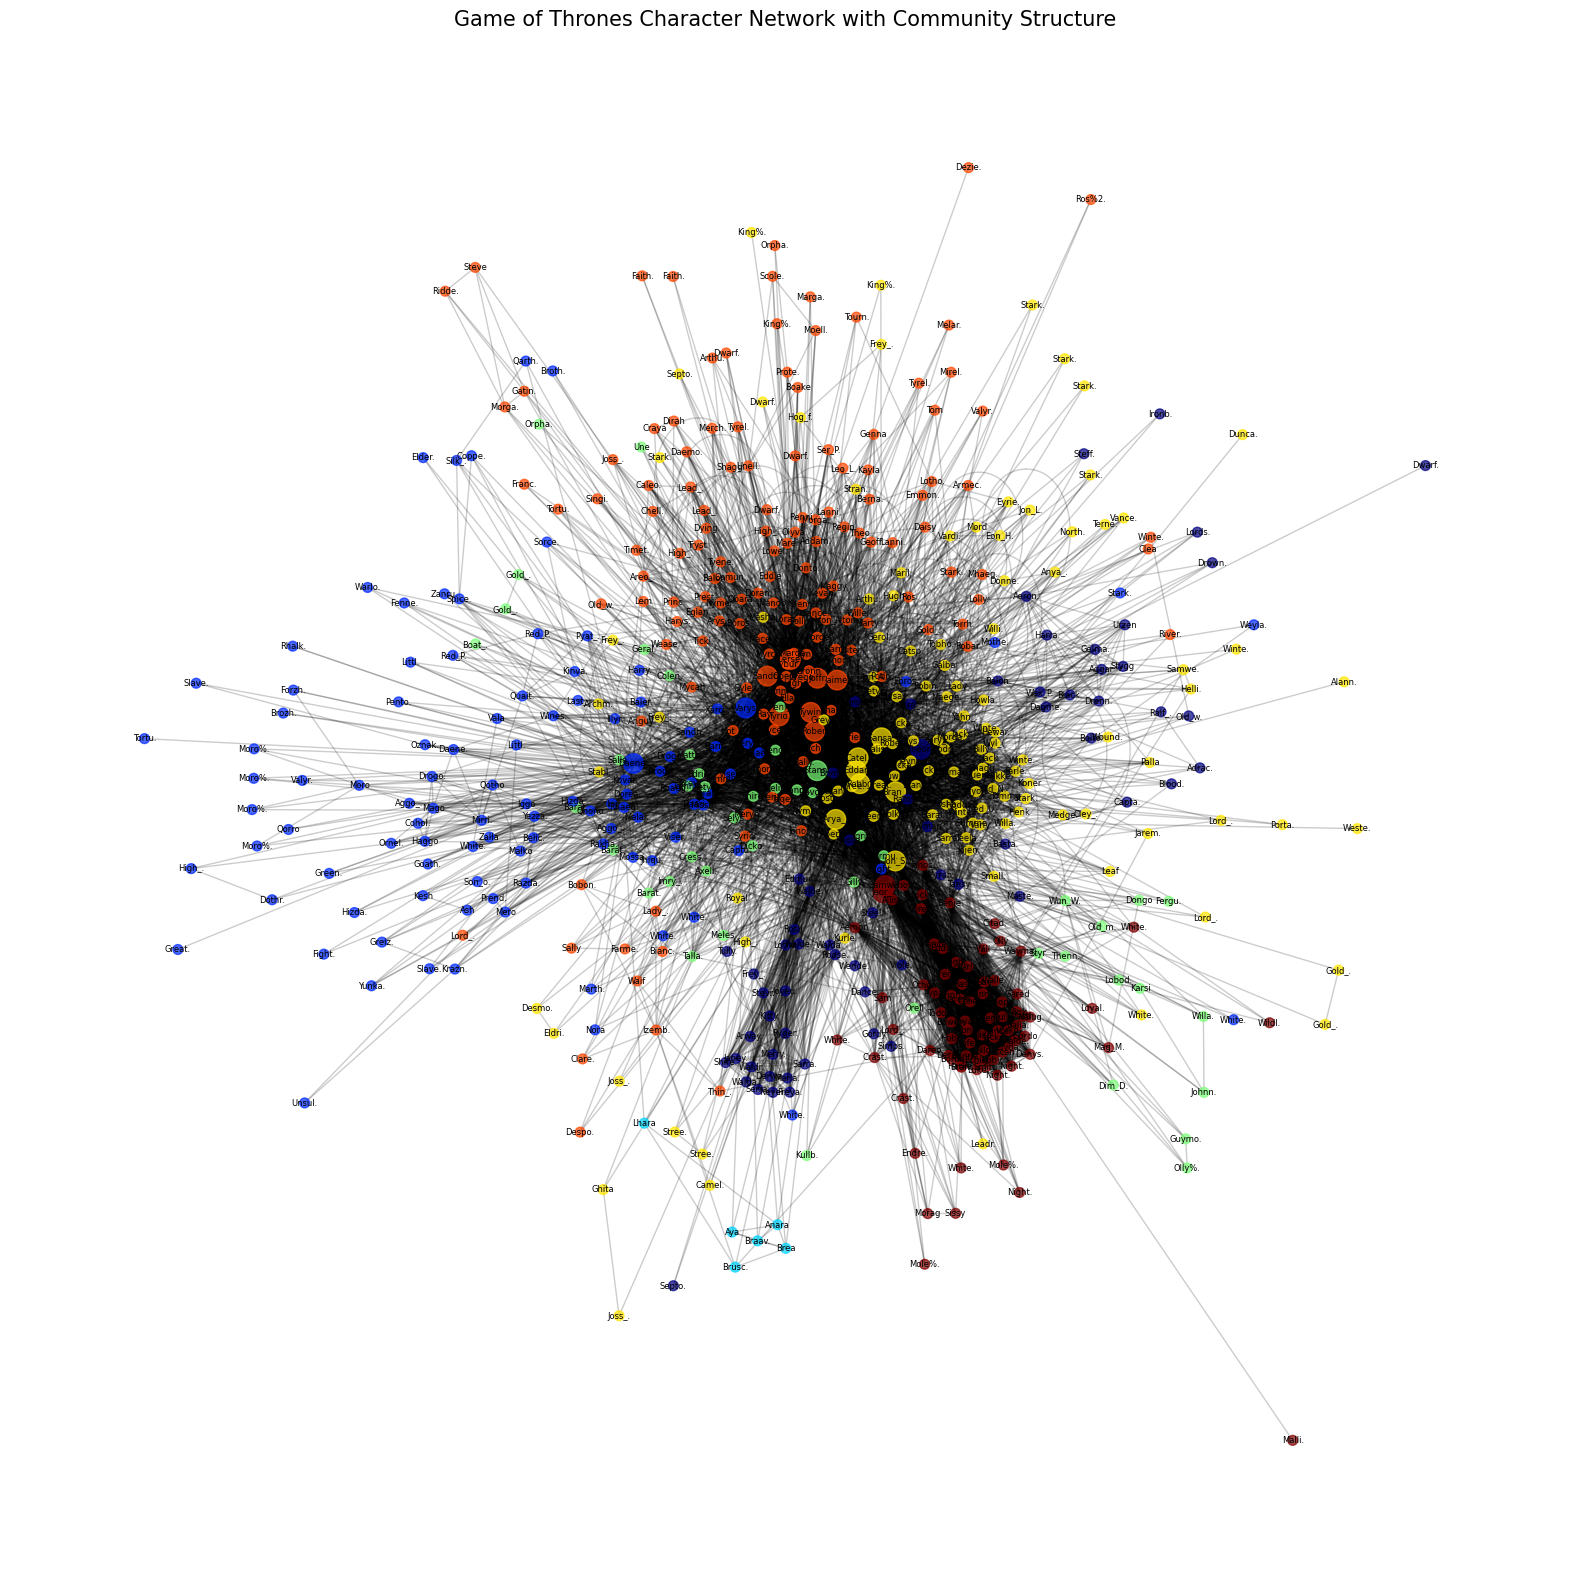

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Initialize the graph
G = nx.Graph()

# Assume character_references is already defined and populated
for character, references in character_references:
    # Add each character as a node
    G.add_node(character)

    # Add edges between the character and each referenced character
    for ref in references:
        G.add_edge(character, ref)

print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")

# Detect communities
partition = community_louvain.best_partition(G)
# Create a color map for the communities
community_colors = {node: partition[node] for node in G.nodes()}

# Use the spring layout algorithm and take into account the community structure for better clustering
pos = nx.spring_layout(G, k=0.1, iterations=50, weight='weight')

plt.figure(figsize=(20, 20))
# Draw the nodes and use the community_colors for color mapping
nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.jet, node_color=list(community_colors.values()), alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Draw small labels for the nodes (optional, can be omitted for a cleaner graph)
small_labels = {k: k[:5] + '.' if len(k) > 5 else k for k in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=small_labels, font_size=6, font_color='black')

plt.title('Game of Thrones Character Network with Community Structure', size=15)
plt.axis('off')
plt.show()
